<a href="https://colab.research.google.com/github/KuriharaYoshiki/python_medical_images/blob/master/hallo_happy_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##第４章　医用画像の標準規格DICOMを理解する

###4.1 はじめに

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 1.3MB/s 


Memo  
・PydicomのインストールはColaboratoryのインスタンス起動するたびに行う必要がある

4.1.1


In [3]:
import pydicom
from matplotlib import pyplot as plt

dcmfnm="/content/drive/My Drive/DATASET/dataset/ct_dcmdir/Brain01"

ds=pydicom.dcmread(dcmfnm)

print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9116.2.6.1.16.1613469034.1289543971.629951
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.392.200036.9116.2.6.1.100
(0002, 0013) Implementation Version Name         SH: 'TM_CT_CMW_V3.00'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9116.2.6.1.16.1613469034.1289543971.629951
(0008, 0020) Study Date                          DA: '20101112'
(0008, 0021) Series Date         

Memo  
・前の4桁：グループ番号  
・後の4桁：エレメント番号

4.1.2

In [4]:
pn=ds.PatientName
wc=ds.WindowCenter
ww=ds.WindowWidth
img=ds.pixel_array
print("PatientName:",pn)
print("wc=",wc)
print("ww=",ww)
print(type(img))

PatientName: Joho^Taro
wc= 40
ww= 80
<class 'numpy.ndarray'>


Memo  
・キーワードには空白を含まないこと

4.1.3

max= 80.0
min= 0.0


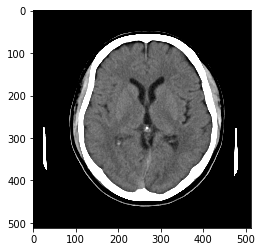

In [5]:
max=wc+ww/2
min=wc-ww/2
print("max=",max)
print("min=",min)

plt.imshow(img,cmap='gray',vmax=max,vmin=min)
plt.show()

###4.2 DICOMとPydicom

Memo  
・VR(Value Representation)  
　値表現という  
　VF(Value Field)に格納されている情報の形式や長さを2文字  
　(2バイト)のコードで表現  
・VL(Value Length)  
　VFに記載されている情報の長さが記述されている  
・IOD(Information Object Definition)  
　データエレメントの構成はモダリティごとに必要な情報の集合に  
　より組み合わされる  
・SOPインスタンスUIDの変更はリスクを伴うことを十分に認識  



4.2.1

In [6]:
import os
import pydicom
from pydicom.tag import Tag

dcmfnm="/content/drive/My Drive/DATASET/dataset/ct_dcmdir/Brain01"
ds=pydicom.dcmread(dcmfnm)

print("SOP Instance UID   :",Tag("SOPInstanceUID"), ds.SOPInstanceUID)
print("Study Date         :",Tag("StudyDate"),      ds.StudyDate)
print("Study Time         :",Tag("StudyTime"),      ds.StudyTime)
print("アクセッション番号 :",Tag("AccessionNumber"),ds.AccessionNumber)
print("画像診断装置       :",Tag("Modality"),       ds.Modality)

SOP Instance UID   : (0008, 0018) 1.2.392.200036.9116.2.6.1.16.1613469034.1289543971.629951
Study Date         : (0008, 0020) 20101112
Study Time         : (0008, 0030) 153820.000
アクセッション番号 : (0008, 0050) 838
画像診断装置       : (0008, 0060) CT


4.2.2

In [7]:
print("患者名         :",Tag("PatientName"),ds.PatientName)
print("患者ID         :",Tag("PatientID"),ds.PatientID)
print("検査部位       :",Tag("BodyPartExamined"),ds.BodyPartExamined)
print("スライス厚     :",Tag("SliceThickness"),ds.SliceThickness)
print("画像再構成関数 :",Tag("ConvolutionKernel"),ds.ConvolutionKernel)

患者名         : (0010, 0010) Joho^Taro
患者ID         : (0010, 0020) 12345678
検査部位       : (0018, 0015) HEAD
スライス厚     : (0018, 0050) 8.0
画像再構成関数 : (0018, 1210) FC21


4.2.3


In [8]:
print("Study Instance UID      :",Tag("StudyInstanceUID"),ds.StudyInstanceUID)
print("Series Instance UID     :",Tag("SeriesInstanceUID"),ds.SeriesInstanceUID)
print("Series Number           :",Tag("SeriesNumber"),ds.SeriesNumber)
print("Image Position(Patient) :",Tag("ImagePositionPatient"),ds.ImagePositionPatient)
print("Acquisition Number      :",Tag("AcquisitionNumber"),ds.AcquisitionNumber)
print("Instance Number         :",Tag("InstanceNumber"),ds.InstanceNumber)
print("Slice Location          :",Tag("SliceLocation"),ds.SliceLocation)

Study Instance UID      : (0020, 000d) 1.2.392.200036.9116.2.6.1.16.1613469034.1289543900.390492
Series Instance UID     : (0020, 000e) 1.2.392.200036.9116.2.6.1.16.1613469034.1289543929.202106
Series Number           : (0020, 0011) 1
Image Position(Patient) : (0020, 0032) [-120.000, -119.7761, -462.6741]
Acquisition Number      : (0020, 0012) 17
Instance Number         : (0020, 0013) 17
Slice Location          : (0020, 1041) +430.00


4.2.4

In [9]:
print("光度測定解釈         :",Tag("PhotometricInterpretation"),ds.PhotometricInterpretation)
print("画像の行列(高さ)     :",Tag("Rows"),ds.Rows)
print("画像の列数(幅)       :",Tag("Columns"),ds.Columns)
print("画素間隔             :",Tag("PixelSpacing"),ds.PixelSpacing)
print("Bits Allocated       :",Tag("BitsAllocated"),ds.BitsAllocated)
print("Bits Stored          :",Tag("BitsStored"),ds.BitsStored)
print("High Bit             :",Tag("HighBit"),ds.HighBit)
print("Pixel Representation :",Tag("PixelRepresentation"),ds.PixelRepresentation)
print("Window Center        :",Tag("WindowCenter"),ds.WindowCenter)
print("Window Width         :",Tag("WindowWidth"),ds.WindowWidth)
print("Rescale Intercept    :",Tag("RescaleIntercept"),ds.RescaleIntercept)
print("Rescale Slope        :",Tag("RescaleSlope"),ds.RescaleSlope)

光度測定解釈         : (0028, 0004) MONOCHROME2
画像の行列(高さ)     : (0028, 0010) 512
画像の列数(幅)       : (0028, 0011) 512
画素間隔             : (0028, 0030) [0.468, 0.468]
Bits Allocated       : (0028, 0100) 16
Bits Stored          : (0028, 0101) 16
High Bit             : (0028, 0102) 15
Pixel Representation : (0028, 0103) 1
Window Center        : (0028, 1050) 40
Window Width         : (0028, 1051) 80
Rescale Intercept    : (0028, 1052) 0
Rescale Slope        : (0028, 1053) 1


###4.3 2つのDICOM画像のデータエレメントを比較する

4.3.1


In [10]:
import pydicom

fnm1="/content/drive/My Drive/DATASET/dataset/ct_dcmdir/Brain01"
fnm2="/content/drive/My Drive/DATASET/dataset/ct_dcmdir/Lung01"

ds1=pydicom.dcmread(fnm1)
print(ds1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9116.2.6.1.16.1613469034.1289543971.629951
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.392.200036.9116.2.6.1.100
(0002, 0013) Implementation Version Name         SH: 'TM_CT_CMW_V3.00'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9116.2.6.1.16.1613469034.1289543971.629951
(0008, 0020) Study Date                          DA: '20101112'
(0008, 0021) Series Date         

4.3.2

In [11]:
allTag=[]
for i,tag in enumerate(ds1):
  tg=str(tag) #DataElement->String
  print(i,">1>tag type=",type(tag))
  print("   -->tg type=",type(tg))
  grpelm=tg[:12]
  print("\t>>>>#",i,":",grpelm)
  allTag+=[grpelm]
print(">1>len=",len(allTag))
print(allTag)

0 >1>tag type= <class 'pydicom.dataelem.DataElement'>
   -->tg type= <class 'str'>
	>>>># 0 : (0008, 0008)
1 >1>tag type= <class 'pydicom.dataelem.DataElement'>
   -->tg type= <class 'str'>
	>>>># 1 : (0008, 0016)
2 >1>tag type= <class 'pydicom.dataelem.DataElement'>
   -->tg type= <class 'str'>
	>>>># 2 : (0008, 0018)
3 >1>tag type= <class 'pydicom.dataelem.DataElement'>
   -->tg type= <class 'str'>
	>>>># 3 : (0008, 0020)
4 >1>tag type= <class 'pydicom.dataelem.DataElement'>
   -->tg type= <class 'str'>
	>>>># 4 : (0008, 0021)
5 >1>tag type= <class 'pydicom.dataelem.DataElement'>
   -->tg type= <class 'str'>
	>>>># 5 : (0008, 0022)
6 >1>tag type= <class 'pydicom.dataelem.DataElement'>
   -->tg type= <class 'str'>
	>>>># 6 : (0008, 0023)
7 >1>tag type= <class 'pydicom.dataelem.DataElement'>
   -->tg type= <class 'str'>
	>>>># 7 : (0008, 0030)
8 >1>tag type= <class 'pydicom.dataelem.DataElement'>
   -->tg type= <class 'str'>
	>>>># 8 : (0008, 0031)
9 >1>tag type= <class 'pydicom.datael

4.3.3

In [12]:
ds2=pydicom.dcmread(fnm2)
for i,tag in enumerate(ds2):
  tg=str(tag)
  grpelm=tg[:12]
  #print(">2>#",i,":",grpelm)
  if grpelm not in allTag:
    print(">2>",grpelm)
    allTag+=[grpelm]
print(allTag)
print(">2>len=",len(allTag))

>2> (0018, 1160)
>2> (0018, 9323)
>2> (0018, 9324)
>2> (7005, 1007)
>2> (7005, 100a)
>2> (7005, 1021)
>2> (7005, 1022)
>2> (7005, 1023)
['(0008, 0008)', '(0008, 0016)', '(0008, 0018)', '(0008, 0020)', '(0008, 0021)', '(0008, 0022)', '(0008, 0023)', '(0008, 0030)', '(0008, 0031)', '(0008, 0032)', '(0008, 0033)', '(0008, 0050)', '(0008, 0060)', '(0008, 0070)', '(0008, 0080)', '(0008, 0090)', '(0008, 1010)', '(0008, 103e)', '(0008, 1040)', '(0008, 1090)', '(0010, 0010)', '(0010, 0020)', '(0010, 0030)', '(0010, 0040)', '(0010, 1010)', '(0018, 0015)', '(0018, 0022)', '(0018, 0050)', '(0018, 0060)', '(0018, 0090)', '(0018, 1000)', '(0018, 1020)', '(0018, 1100)', '(0018, 1120)', '(0018, 1130)', '(0018, 1140)', '(0018, 1150)', '(0018, 1151)', '(0018, 1152)', '(0018, 1170)', '(0018, 1210)', '(0018, 5100)', '(0018, 9345)', '(0020, 000d)', '(0020, 000e)', '(0020, 0010)', '(0020, 0011)', '(0020, 0012)', '(0020, 0013)', '(0020, 0020)', '(0020, 0032)', '(0020, 0037)', '(0020, 0052)', '(0020, 1040)',

Memo  
・データセット(ds)からタグ番号(groupとelement)を指定して値を  
　取得するには次のようにする  
　ds[group,element].value  

4.3.4

In [13]:
allTag=sorted(allTag)
print("sort:",allTag)
for tg in allTag:
  val1="value None"
  val2="Value None"
  kywd=""
  vr=""
  grp=tg[1:5]  #Group
  elm=tg[7:11] #Elemnt

  if tg in str(ds1):   #もしタグ番号tgがデータセットds1にあれば
    val1=ds1[grp,elm].value
    kywd=ds1[grp,elm].keyword
    vr=ds1[grp,elm].VR
  if tg in str(ds2):   #もしタグ番号tgがデータセットds1にあれば
    val1=ds2[grp,elm].value
    kywd=ds2[grp,elm].keyword
    vr=ds2[grp,elm].VR
  
  if val1==val2:      #もし同じ値があれば
    print(">3>",grp,elm,vr,kywd,"\t Same Value:",val1)
  else:
    val1=str(val1)
    val2=str(val2)
    print("\n>3>",grp,elm,vr,kywd,"\t Not Same Value:")
    print("\tfile1:",val1[:50])
    print("\tfile2:",val2[:50])
    print()


sort: ['(0008, 0008)', '(0008, 0016)', '(0008, 0018)', '(0008, 0020)', '(0008, 0021)', '(0008, 0022)', '(0008, 0023)', '(0008, 0030)', '(0008, 0031)', '(0008, 0032)', '(0008, 0033)', '(0008, 0050)', '(0008, 0060)', '(0008, 0070)', '(0008, 0080)', '(0008, 0090)', '(0008, 1010)', '(0008, 103e)', '(0008, 1040)', '(0008, 1090)', '(0010, 0010)', '(0010, 0020)', '(0010, 0030)', '(0010, 0040)', '(0010, 1010)', '(0018, 0015)', '(0018, 0022)', '(0018, 0050)', '(0018, 0060)', '(0018, 0090)', '(0018, 1000)', '(0018, 1020)', '(0018, 1100)', '(0018, 1120)', '(0018, 1130)', '(0018, 1140)', '(0018, 1150)', '(0018, 1151)', '(0018, 1152)', '(0018, 1160)', '(0018, 1170)', '(0018, 1210)', '(0018, 5100)', '(0018, 9323)', '(0018, 9324)', '(0018, 9345)', '(0020, 000d)', '(0020, 000e)', '(0020, 0010)', '(0020, 0011)', '(0020, 0012)', '(0020, 0013)', '(0020, 0020)', '(0020, 0032)', '(0020, 0037)', '(0020, 0052)', '(0020, 1040)', '(0020, 1041)', '(0028, 0002)', '(0028, 0004)', '(0028, 0010)', '(0028, 0011)', '

###4.4 DICOM画像を匿名化する

Memo  
・匿名化による値の変更はDICOM違反やデータの改ざんにならな  
　いよう十分注意する

4.4.1


In [14]:
import os
import pydicom

orgdir="/content/drive/My Drive/DATASET/dataset/ct_dcmdir/"
dstdir="/content/drive/My Drive/result/"

if not os.path.isdir(dstdir):
  os.mkdir(dstdir)
  print("新しくディレクトリ"+dstdir+"を作成しました")
else:
  print("既にディレクトリ"+dstdir+"は存在します")

既にディレクトリ/content/drive/My Drive/result/は存在します


4.4.2

In [15]:
anonyInfo=[["00100010","no name"],
           ["00100020","no ptid"],]
print(anonyInfo)
files=os.listdir(orgdir)
print(files)

[['00100010', 'no name'], ['00100020', 'no ptid']]
['Brain02', 'Abdomen03', 'Brain01', 'Abdomen01', 'Abdomen02', 'Lung03', 'Lung02', 'Lung01']


Memo  
・データセット(ds)のタグ番号(tag_number)のデータエレメント  
　の値を新しい値(new_value)に変更する際は次のように行う  
　ds[tag_number].value=new_value

4.4.3

In [16]:
for i,fnm in enumerate(files):
  path=orgdir+fnm
  ds=pydicom.dcmread(path)
  for j,info in enumerate(anonyInfo):
    tag=info[0]
    print(tag)
    val=info[1]
    print(val)
    print(">>1>>",i,j,tag,fnm)
    print(">>2>>",ds[tag])
    ds[tag].value=val
    print(">>3>>",ds[tag])
  savefnm=dstdir+"anony."+fnm 
  pydicom.dcmwrite(savefnm,ds)

00100010
no name
>>1>> 0 0 00100010 Brain02
>>2>> (0010, 0010) Patient's Name                      PN: 'Joho^Taro'
>>3>> (0010, 0010) Patient's Name                      PN: 'no name'
00100020
no ptid
>>1>> 0 1 00100020 Brain02
>>2>> (0010, 0020) Patient ID                          LO: '12345678'
>>3>> (0010, 0020) Patient ID                          LO: 'no ptid'
00100010
no name
>>1>> 1 0 00100010 Abdomen03
>>2>> (0010, 0010) Patient's Name                      PN: 'Joho^Taro'
>>3>> (0010, 0010) Patient's Name                      PN: 'no name'
00100020
no ptid
>>1>> 1 1 00100020 Abdomen03
>>2>> (0010, 0020) Patient ID                          LO: '12345678'
>>3>> (0010, 0020) Patient ID                          LO: 'no ptid'
00100010
no name
>>1>> 2 0 00100010 Brain01
>>2>> (0010, 0010) Patient's Name                      PN: 'Joho^Taro'
>>3>> (0010, 0010) Patient's Name                      PN: 'no name'
00100020
no ptid
>>1>> 2 1 00100020 Brain01
>>2>> (0010, 0020) Patient ID     

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9116.2.6.1.16.1613469034.1289543971.629951
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.392.200036.9116.2.6.1.100
(0002, 0013) Implementation Version Name         SH: 'TM_CT_CMW_V3.00'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9116.2.6.1.16.1613469034.1289543971.629951
(0008, 0020) Study Date                          DA: '20101112'
(0008, 0021) Series Date         

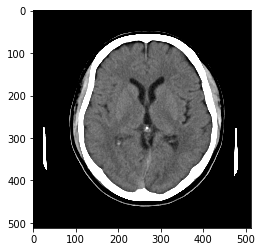

In [17]:
brain="/content/drive/My Drive/result/anony.Brain01"

ds=pydicom.dcmread(brain)
print(ds)
wc=ds.WindowCenter
ww=ds.WindowWidth
img=ds.pixel_array
max=wc+ww/2
min=wc-ww/2
plt.imshow(img,cmap="gray",vmax=max,vmin=min)
plt.show()

###4.5 DICOM画像をPNGに変換する

4.5.1


In [18]:
import numpy as np
import cv2
import pydicom

dcmfnm="/content/drive/My Drive/DATASET/dataset/ct_dcmdir/Brain01"

ds=pydicom.dcmread(dcmfnm)   #DICOM画像を読み込む
#print(ds)
wc=ds.WindowCenter           #ウィンドウセンター値に代入
ww=ds.WindowWidth            #ウィンドウ幅を代入
ri=ds.RescaleIntercept       #リスケール切片
rs=ds.RescaleSlope           #リスケール勾配
img1=ds.pixel_array           #画素値を代入

print("Window Center   :",wc)
print("Window Width    :",ww)
print("RescaleIntercept:",ri)
print("RescaleSlope    :",rs)

Window Center   : 40
Window Width    : 80
RescaleIntercept: 0
RescaleSlope    : 1


4.5.2

In [19]:
#img=img*rs+ri
max=wc+ww/2
min=wc-ww/2
print("wc=",wc,"ww=",ww,"→max=",max,"min=",min)

wc= 40 ww= 80 →max= 80.0 min= 0.0


4.5.3


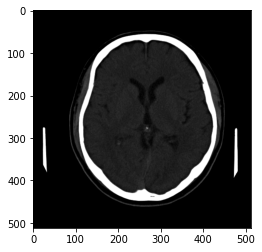

In [20]:
img2=255*(img1-min)/(max-min)
img2=np.clip(img1,0,255)
'''
for data in img:
  print(data)
'''
cv2.imwrite("/content/drive/My Drive/Brain01.png",img2)

plt.imshow(img2,cmap="gray")
plt.show()

###4.6 DICOM画像を画像位置でソートする

4.6.1

In [21]:
import os
import pydicom

dirname="/content/drive/My Drive/DATASET/dataset/ct_dcmdir/"

files=os.listdir(dirname)
for i,filename in enumerate(files):
  d=pydicom.dcmread(dirname+filename)
  print("Original>>",i,filename,"\t",d.ImagePositionPatient)

Original>> 0 Brain02 	 [-120.000, -119.7761, -508.6741]
Original>> 1 Abdomen03 	 [-199.218, -210.9375, -1024.000]
Original>> 2 Brain01 	 [-120.000, -119.7761, -462.6741]
Original>> 3 Abdomen01 	 [-199.218, -210.9375, -949.0000]
Original>> 4 Abdomen02 	 [-199.218, -210.9375, -954.0000]
Original>> 5 Lung03 	 [-199.218, -210.9375, -904.0000]
Original>> 6 Lung02 	 [-199.218, -210.9375, -814.0000]
Original>> 7 Lung01 	 [-199.218, -210.9375, -789.0000]


In [22]:
a={"b":3,"c":1,"a":2}
sorted(a)

['a', 'b', 'c']

In [23]:
sorted(a.items())

[('a', 2), ('b', 3), ('c', 1)]

In [24]:
sorted(a.items(),key=lambda x:x[1])

[('c', 1), ('a', 2), ('b', 3)]

4.6.2

In [25]:
filedic={}   #ファイル名とImagePositionを代入する辞書
filelist=[]  #ソートされた順でファイル名を代入するリスト

for i,filename in enumerate(files):
  d=pydicom.dcmread(dirname+filename)
  filedic[filename]=d.ImagePositionPatient[2]
  print("MakeDic>>",i,filename,"\t",filedic[filename])

MakeDic>> 0 Brain02 	 -508.6741
MakeDic>> 1 Abdomen03 	 -1024.000
MakeDic>> 2 Brain01 	 -462.6741
MakeDic>> 3 Abdomen01 	 -949.0000
MakeDic>> 4 Abdomen02 	 -954.0000
MakeDic>> 5 Lung03 	 -904.0000
MakeDic>> 6 Lung02 	 -814.0000
MakeDic>> 7 Lung01 	 -789.0000


In [26]:
fileSorted=sorted(filedic.items(),key=lambda x:-x[1])
for i,fname_imgPos in enumerate(fileSorted):
  filelist.append(fname_imgPos[0])
  print("Sorted>>",i,fname_imgPos[0],"\t:",fname_imgPos[1])
print("Result>>",filelist)

Sorted>> 0 Brain01 	: -462.6741
Sorted>> 1 Brain02 	: -508.6741
Sorted>> 2 Lung01 	: -789.0000
Sorted>> 3 Lung02 	: -814.0000
Sorted>> 4 Lung03 	: -904.0000
Sorted>> 5 Abdomen01 	: -949.0000
Sorted>> 6 Abdomen02 	: -954.0000
Sorted>> 7 Abdomen03 	: -1024.000
Result>> ['Brain01', 'Brain02', 'Lung01', 'Lung02', 'Lung03', 'Abdomen01', 'Abdomen02', 'Abdomen03']


###4.7 DICOM画像をシリーズ毎に整理する

4.7.1

In [27]:
import os
import pydicom

dirnm="/content/drive/My Drive/DATASET/dataset/ct_dcmdir/"
dstdir="/content/drive/My Drive/result"

if not os.path.isdir(dstdir):
  os.mkdir(dstdir)
  print("新しくディレクトリ"+dstdir+"を作成しました。")

files=os.listdir(dirnm)
print(">>1>>",files)

for fnm in files:
  ds=pydicom.dcmread(dirnm+fnm)
  print("-"*50)
  print("File Name:",ds.SeriesInstanceUID)
  print("Seiris No",ds.SeriesNumber)

>>1>> ['Brain02', 'Abdomen03', 'Brain01', 'Abdomen01', 'Abdomen02', 'Lung03', 'Lung02', 'Lung01']
--------------------------------------------------
File Name: 1.2.392.200036.9116.2.6.1.16.1613469034.1289543929.202106
Seiris No 1
--------------------------------------------------
File Name: 1.2.392.200036.9116.2.6.1.16.1613469034.1289544231.883115
Seiris No 2
--------------------------------------------------
File Name: 1.2.392.200036.9116.2.6.1.16.1613469034.1289543929.202106
Seiris No 1
--------------------------------------------------
File Name: 1.2.392.200036.9116.2.6.1.16.1613469034.1289544231.883115
Seiris No 2
--------------------------------------------------
File Name: 1.2.392.200036.9116.2.6.1.16.1613469034.1289544231.883115
Seiris No 2
--------------------------------------------------
File Name: 1.2.392.200036.9116.2.6.1.16.1613469034.1289544291.542320
Seiris No 3
--------------------------------------------------
File Name: 1.2.392.200036.9116.2.6.1.16.1613469034.12895442

4.7.2

In [28]:
for fnm in files:
  ds=pydicom.dcmread(dirnm+fnm)
  subdir=str(ds.SeriesNumber)
  #print(subdir)
  if not os.path.isdir(dstdir+subdir):
    os.mkdir(dstdir+subdir)
    print("サブディレクトリ",subdir,"を作成しました。")
  pydicom.dcmwrite(dstdir+subdir+"/"+fnm,ds)
  print("\tファイル",fnm,"をコピーしました。")

	ファイル Brain02 をコピーしました。
	ファイル Abdomen03 をコピーしました。
	ファイル Brain01 をコピーしました。
	ファイル Abdomen01 をコピーしました。
	ファイル Abdomen02 をコピーしました。
	ファイル Lung03 をコピーしました。
	ファイル Lung02 をコピーしました。
	ファイル Lung01 をコピーしました。


###4.8 DICOM画像をひとつのディレクトリに集める

4.8.1

In [29]:
import os 
import datetime
import pydicom

orgdir="/content/drive/My Drive/result2/"
dstdir="/content/drive/My Drive/result3/"

if not os.path.isdir(dstdir):
  os.mkdir(dstdir)
  print("新しいディレクトリ"+dstdir+"を作成しました。")


4.8.2


In [30]:
def searchsubdir(dirnm):
  print(">>0>>",dirnm)
  dirs=os.listdir(dirnm)
  print(">>1>>",dirs)
  dirs=[dirnm+dir for dir in dirs]
  print(">>2>>",dirs)
  filelist=[]
  for dr in dirs:
    if os.path.isdir(dr):
      print(">>3>>",dr,"is Directory")
      dirs+=searchsubdir(dr+'/')
    else:
      print(">>4>>",dr,"is File")
      filelist+=[dr]

  return filelist

files=searchsubdir(orgdir)
print(files)

>>0>> /content/drive/My Drive/result2/
>>1>> ['Abdomen03', 'Abdomen02', 'Abdomen01']
>>2>> ['/content/drive/My Drive/result2/Abdomen03', '/content/drive/My Drive/result2/Abdomen02', '/content/drive/My Drive/result2/Abdomen01']
>>4>> /content/drive/My Drive/result2/Abdomen03 is File
>>4>> /content/drive/My Drive/result2/Abdomen02 is File
>>4>> /content/drive/My Drive/result2/Abdomen01 is File
['/content/drive/My Drive/result2/Abdomen03', '/content/drive/My Drive/result2/Abdomen02', '/content/drive/My Drive/result2/Abdomen01']


4.8.3

In [31]:
dt=str(datetime.datetime.now())
print('>>6>>',dt)
print('>>7>>',dt.replace(' ','_'))
print(">>8>>",dt.replace(' ','_').replace(':','.'))

>>6>> 2020-06-23 12:19:27.703036
>>7>> 2020-06-23_12:19:27.703036
>>8>> 2020-06-23_12.19.27.703036


4.8.4

In [32]:
for dcmfnm in files:
  ds=pydicom.dcmread(dcmfnm)
  dt=str(datetime.datetime.now()).replace(' ','_').replace(':','.')
  newfnm=dstdir+str(dt)
  pydicom.dcmwrite(newfnm,ds)
  print(">>time>>",dcmfnm,"->",newfnm)

>>time>> /content/drive/My Drive/result2/Abdomen03 -> /content/drive/My Drive/result3/2020-06-23_12.19.27.718529
>>time>> /content/drive/My Drive/result2/Abdomen02 -> /content/drive/My Drive/result3/2020-06-23_12.19.27.735007
>>time>> /content/drive/My Drive/result2/Abdomen01 -> /content/drive/My Drive/result3/2020-06-23_12.19.27.748541


4.8.5

In [33]:
print(">>9>>",files[0])
print(">>10>>",files[0].replace('/','_'))
print(">>11>>",files[0].replace('/','_').lstrip('.'))
print(">>12>>",files[0].replace('/','_').lstrip('.').lstrip("_"))

>>9>> /content/drive/My Drive/result2/Abdomen03
>>10>> _content_drive_My Drive_result2_Abdomen03
>>11>> _content_drive_My Drive_result2_Abdomen03
>>12>> content_drive_My Drive_result2_Abdomen03


4.8.6

In [34]:
for dcmfnm in files:
  ds=pydicom.dcmread(dcmfnm)
  newfnm=dstdir+dcmfnm.replace("/","_").lstrip(".").lstrip("_")
  pydicom.dcmwrite(newfnm,ds)
  print(">>pathname>>",dcmfnm,'->',newfnm)

>>pathname>> /content/drive/My Drive/result2/Abdomen03 -> /content/drive/My Drive/result3/content_drive_My Drive_result2_Abdomen03
>>pathname>> /content/drive/My Drive/result2/Abdomen02 -> /content/drive/My Drive/result3/content_drive_My Drive_result2_Abdomen02
>>pathname>> /content/drive/My Drive/result2/Abdomen01 -> /content/drive/My Drive/result3/content_drive_My Drive_result2_Abdomen01


4.8.7

In [35]:
for dcmfnm in files:
  ds=pydicom.dcmread(dcmfnm)
  newfnm=dstdir+ds.SOPInstanceUID
  pydicom.dcmwrite(newfnm,ds)
  print(">>SOP>>",dcmfnm,'->',newfnm)

>>SOP>> /content/drive/My Drive/result2/Abdomen03 -> /content/drive/My Drive/result3/1.2.392.200036.9116.2.6.1.16.1613469034.1289544259.847222
>>SOP>> /content/drive/My Drive/result2/Abdomen02 -> /content/drive/My Drive/result3/1.2.392.200036.9116.2.6.1.16.1613469034.1289544253.849998
>>SOP>> /content/drive/My Drive/result2/Abdomen01 -> /content/drive/My Drive/result3/1.2.392.200036.9116.2.6.1.16.1613469034.1289544253.352221


###4.9 DICOM圧縮画像を外部ツールを使って解凍する

In [45]:
!sudo apt install dcmtk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
dcmtk is already the newest version (3.6.2-3build3).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [46]:
!dcmdjpeg

$dcmtk: dcmdjpeg v3.6.2 2017-07-14 $

dcmdjpeg: Decode JPEG-compressed DICOM file
usage: dcmdjpeg [options] dcmfile-in dcmfile-out

parameters:
  dcmfile-in                     DICOM input filename to be converted
  dcmfile-out                    DICOM output filename

general options:
  -h      --help                 print this help text and exit
          --version              print version information and exit
          --arguments            print expanded command line arguments
  -q      --quiet                quiet mode, print no warnings and errors
  -v      --verbose              verbose mode, print processing details
  -d      --debug                debug mode, print debug information
  -ll     --log-level            [l]evel: string constant
                                 (fatal, error, warn, info, debug, trace)
                                 use level l for the logger
  -lc     --log-config           [f]ilename: string
                                 use config file f f

4.9.1

In [64]:
import subprocess
import pydicom
from matplotlib import pyplot as plt

def decompjpeg(in_fnm,out_fnm):
  cmdline="dcmdjpeg "+in_fnm+" "+out_fnm
  proc=subprocess.run(cmdline,shell=True)
  print(proc)

  return proc

Memo  
・コマンドラインの引数の中に空白が含まれるとき、  
　ダブルクォーテーションで括る

4.9.2


CompletedProcess(args='dcmdjpeg /content/drive/"My Drive"/DATASET/dataset/mr_dcmdir/Knee01 /content/drive/"My Drive"/Knee01', returncode=0)
max= 4608.5 min= -0.5


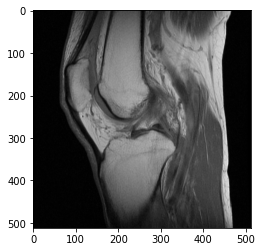

In [65]:
cfnm='/content/drive/"My Drive"/DATASET/dataset/mr_dcmdir/Knee01'
dfnm='/content/drive/"My Drive"/Knee01'

decompjpeg(cfnm,dfnm)

dfnm1=dfnm.replace('"','')
ds=pydicom.dcmread(dfnm1)
wc=ds.WindowCenter
ww=ds.WindowWidth
img=ds.pixel_array

max=wc+ww/2
min=wc-ww/2
print("max=",max,"min=",min)
plt.imshow(img,cmap="gray",vmax=max,vmin=min)
plt.show()